In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(-0.5, 1855.5, 1751.5, -0.5)

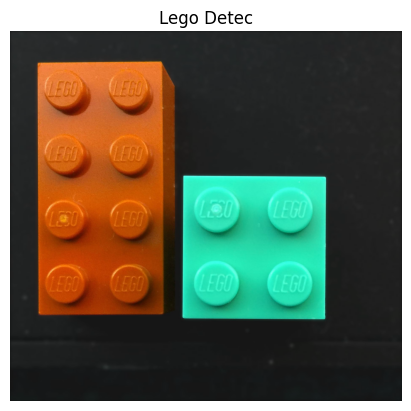

In [10]:
# Bild laden
image = cv2.imread('../images/image.jpg')

plt.imshow(image, cmap='gray')
plt.title('Lego Detec')
plt.axis('off')

(-0.5, 1855.5, 1751.5, -0.5)

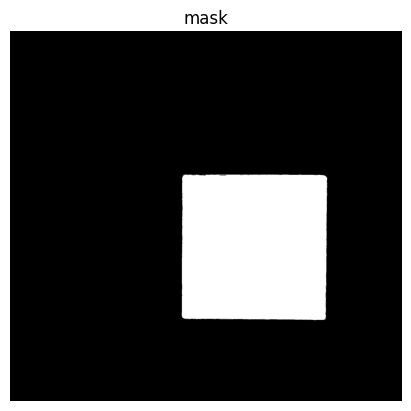

In [11]:
# Farbsegmentierung (Beispiel: grüne Legosteine)
lower_green = np.array([30, 50, 50])
upper_green = np.array([80, 255, 255])
mask = cv2.inRange(cv2.cvtColor(image, cv2.COLOR_BGR2HSV), lower_green, upper_green)

plt.imshow(mask, cmap='gray')
plt.title('mask')
plt.axis('off')

(-0.5, 1855.5, 1751.5, -0.5)

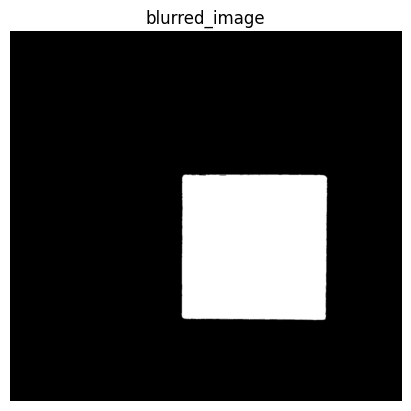

In [12]:
blurred_image = cv2.GaussianBlur(mask, (5, 5), 0)

plt.imshow(blurred_image, cmap='gray')
plt.title('blurred_image')
plt.axis('off')

Anzahl der Konturen: 10


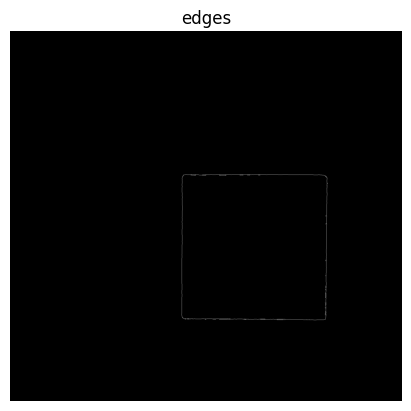

In [13]:
# Kantenerkennung
edges = cv2.Canny(blurred_image, 50, 150)

plt.imshow(edges, cmap='gray')
plt.title('edges')
plt.axis('off')
# Konturfindung
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Anzahl der Konturen:", len(contours))

0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.5
2.0
399.0


(-0.5, 1855.5, 1751.5, -0.5)

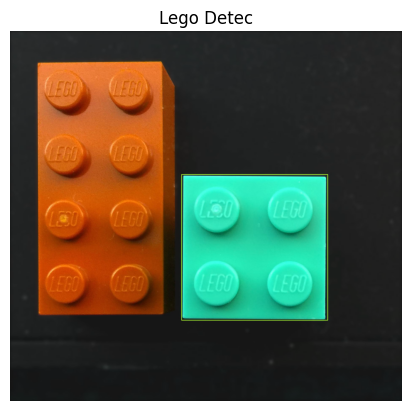

In [14]:
# Objekterkennung und Markierung
for contour in contours:
    area = cv2.contourArea(contour)
    print(area)
    if area > 100:  # Beispielgrenze für die Mindestgröße der Kontur
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (180, 255, 50), 2)
# Bild anzeigen
plt.imshow(image, cmap='gray')
plt.title('Lego Detec')
plt.axis('off')